#following dataset provides data on foodborne disease outbreaks reported to CDC from 1998 through 2015
#the analysis is done in order to analyze if the foodborne disease outbreaks increasing or decreasing 
#and What contaminant has been responsible for the most illnesses, hospitalizations, and deaths? 
#What location for food preparation poses the greatest risk of foodborne illness
#The original data consists of 19119 rows and 12 columns.

In [1]:
import pandas as pd
df1=pd.read_csv("C:/Users/gaura/Downloads/foodborne-diseases/outbreaks.csv")
df1.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,19119.000000,19119.000000,15494.000000,15518.000000
mean,2005.562373,19.537162,0.947528,0.021717
std,5.158404,49.452417,5.312772,0.386976
min,1998.000000,2.000000,0.000000,0.000000
25%,2001.000000,3.000000,0.000000,0.000000
50%,2005.000000,8.000000,0.000000,0.000000
75%,2010.000000,19.000000,1.000000,0.000000
max,2015.000000,1939.000000,308.000000,33.000000


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_boston

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [4]:
df1.head(n=5)
#the following data has Year,Month,State,Location,Food,Ingredient,Species,Soretype/Genotype,Status,Illnesses,Hospitalization,Fatalities

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [5]:
#datacleaning
#are there any missing values?
df1.apply(lambda x: sum(x.isnull()), axis=0)
#yes.Shown below

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

In [6]:
#since Serotype/Genotype and Ingredient have many rows of missing values.Let us get the analysis.
c=sum(df1['Serotype/Genotype'].isnull())
print(c)
d=len(df1['Serotype/Genotype'])
print(d)
(c/d)*100

15212
19119


79.564830796589774

In [7]:
c=sum(df1['Ingredient'].isnull())
print(c)
d=len(df1['Ingredient'])
print(d)
(c/d)*100

17243
19119


90.187771326952245

In [15]:
#more than 75%
#hence dropping them for analysis

In [16]:
df2=df1.copy()

In [17]:
df2.dropna(inplace=True)
del df2['Serotype/Genotype']
del df2['Ingredient']

In [18]:
df2.isnull().sum()

Year                0
Month               0
State               0
Location            0
Food                0
Species             0
Status              0
Illnesses           0
Hospitalizations    0
Fatalities          0
dtype: int64

In [19]:
#are there any inappropriate values?
df2.info()
#there are no inappropriate values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 638 to 19081
Data columns (total 10 columns):
Year                420 non-null int64
Month               420 non-null object
State               420 non-null object
Location            420 non-null object
Food                420 non-null object
Species             420 non-null object
Status              420 non-null object
Illnesses           420 non-null int64
Hospitalizations    420 non-null float64
Fatalities          420 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 36.1+ KB


In [20]:
df2.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,420.000000,420.000000,420.000000,420.000000
mean,2008.040476,28.488095,3.635714,0.026190
std,5.269426,47.681695,8.179850,0.159892
min,1998.000000,2.000000,0.000000,0.000000
25%,2004.000000,6.000000,0.000000,0.000000
50%,2008.500000,13.000000,1.000000,0.000000
75%,2013.000000,30.000000,4.000000,0.000000
max,2015.000000,429.000000,129.000000,1.000000


In [21]:
#data is cleaned.

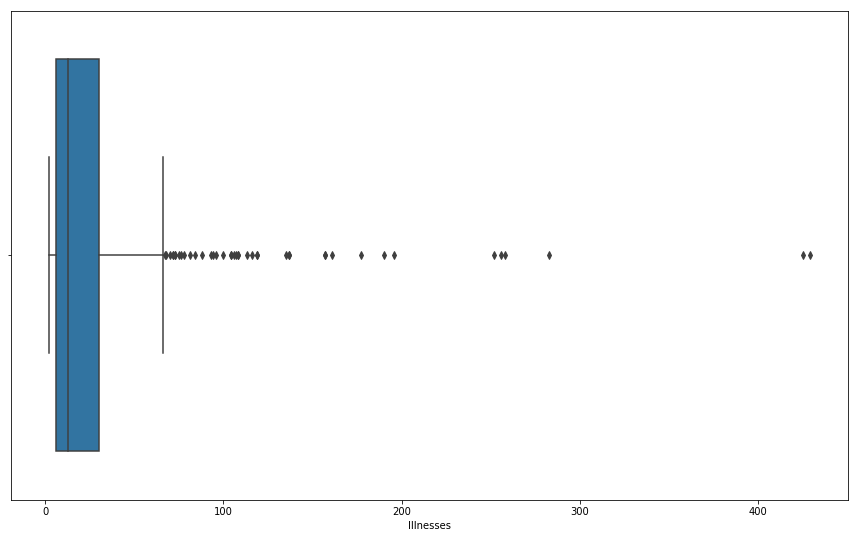

In [22]:
#distribution of the data
sns.boxplot(x=df2["Illnesses"])
#data is approx normally distributed from 1 to 55 after which we see outlier value of 250

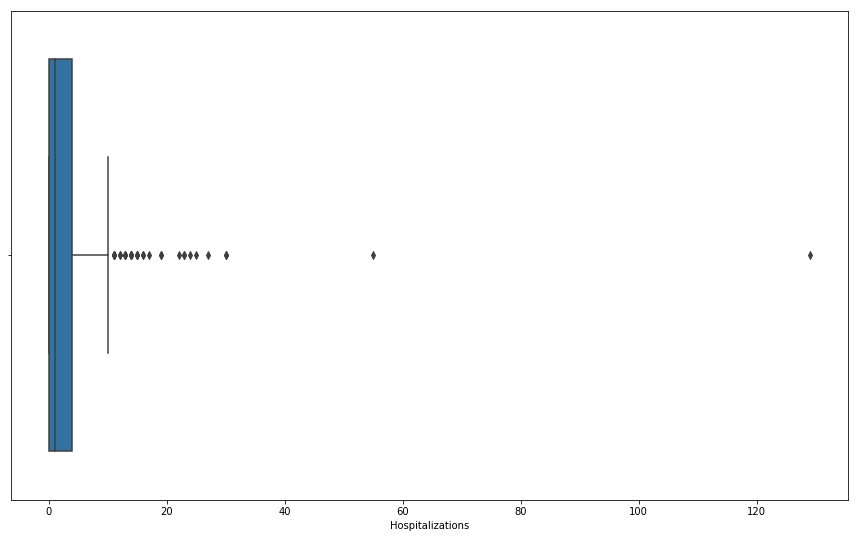

In [23]:
sns.boxplot(x=df2["Hospitalizations"])
#normally distributed-0 to 10 and outliers of 30

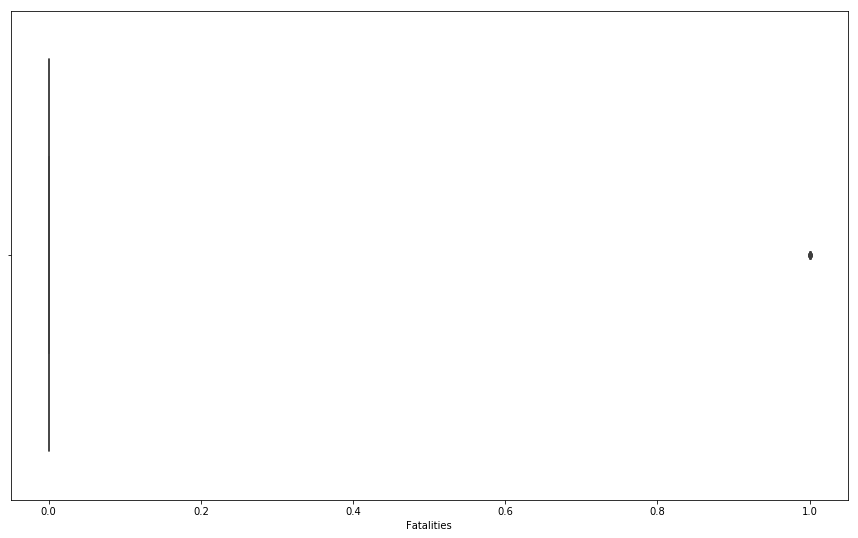

In [24]:
sns.boxplot(x=df2["Fatalities"])

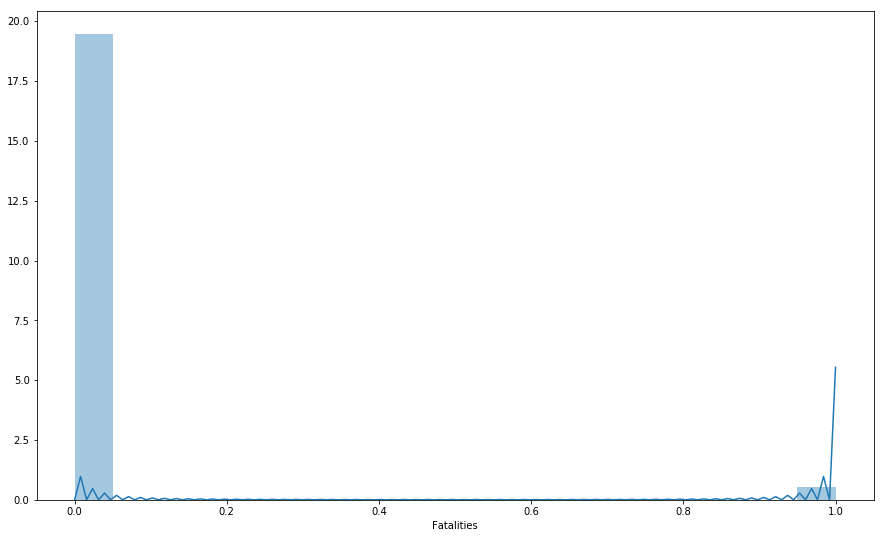

In [25]:
sns.distplot(df2['Fatalities'])
#desnity is around 0.outliers of 1

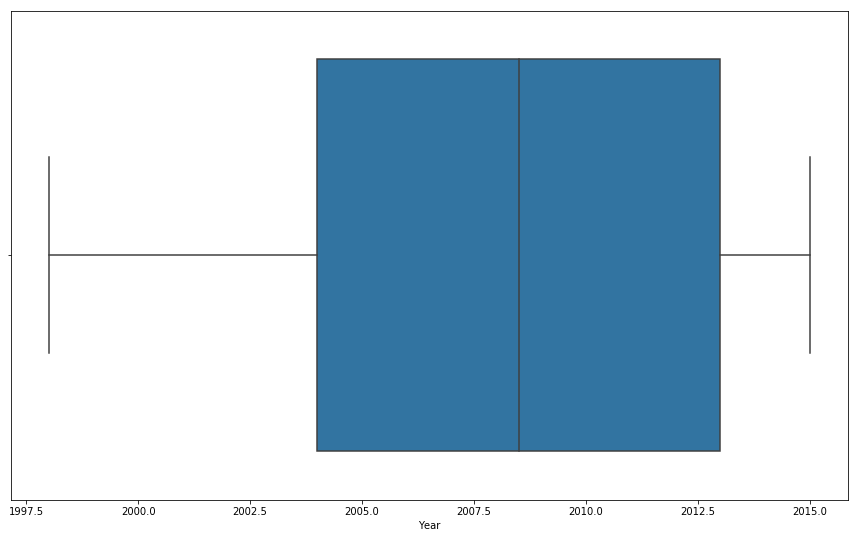

In [26]:
sns.boxplot(x=df2["Year"])
#Data is normally distributed. there are no outliers

In [27]:
df2.describe()
#statistics

,Year,Illnesses,Hospitalizations,Fatalities
count,420.000000,420.000000,420.000000,420.000000
mean,2008.040476,28.488095,3.635714,0.026190
std,5.269426,47.681695,8.179850,0.159892
min,1998.000000,2.000000,0.000000,0.000000
25%,2004.000000,6.000000,0.000000,0.000000
50%,2008.500000,13.000000,1.000000,0.000000
75%,2013.000000,30.000000,4.000000,0.000000
max,2015.000000,429.000000,129.000000,1.000000


Text(0,0.5,'Hospitalizations')

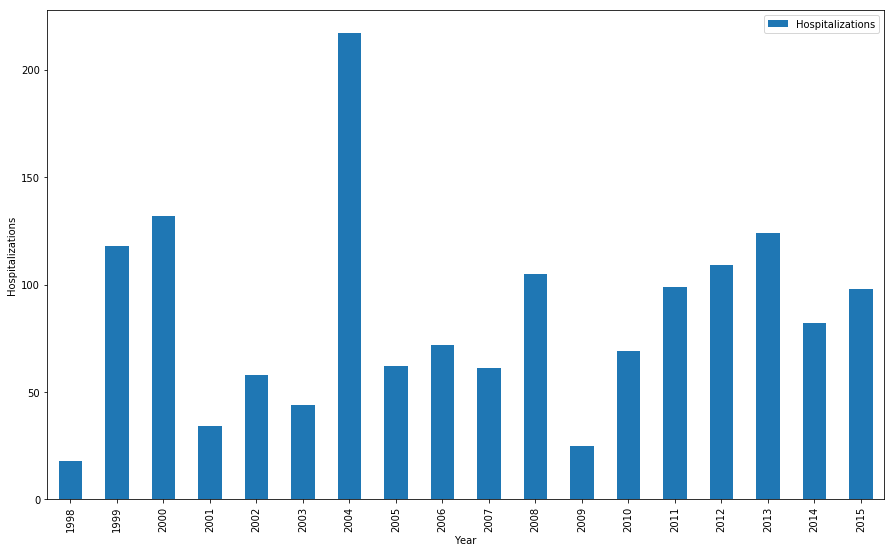

In [28]:
#from year 1998 to 2000 and number of hospitaizations from 0 to 129 
year=df2[['Year','Hospitalizations']]
year_grp=year.groupby('Year')
year_totals=year_grp.sum()
year_fat_plot = year_totals.plot(kind='bar')


year_fat_plot.set_xlabel("Year")
year_fat_plot.set_ylabel("Hospitalizations")
#maximum number of hospitalizations were in year 2004

In [29]:
df2['Hospitalizations'].mean()

3.6357142857142857

Text(0,0.5,'Illnesses')

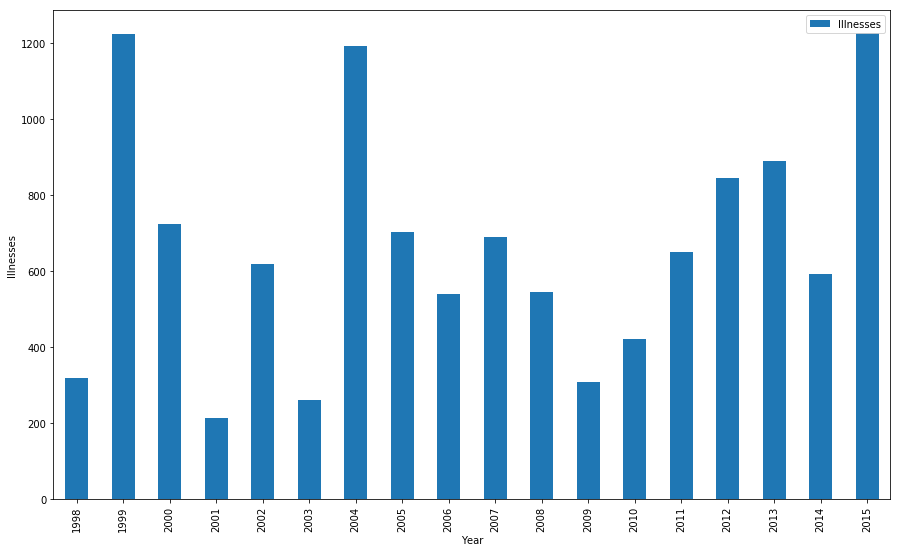

In [33]:
#for year with respect to illnesses
year=df2[['Year','Illnesses']]
year_grp=year.groupby('Year')
year_totals=year_grp.sum()
year_fat_plot = year_totals.plot(kind='bar')


year_fat_plot.set_xlabel("Year")
year_fat_plot.set_ylabel("Illnesses")
#max no of illnesses in year 1999

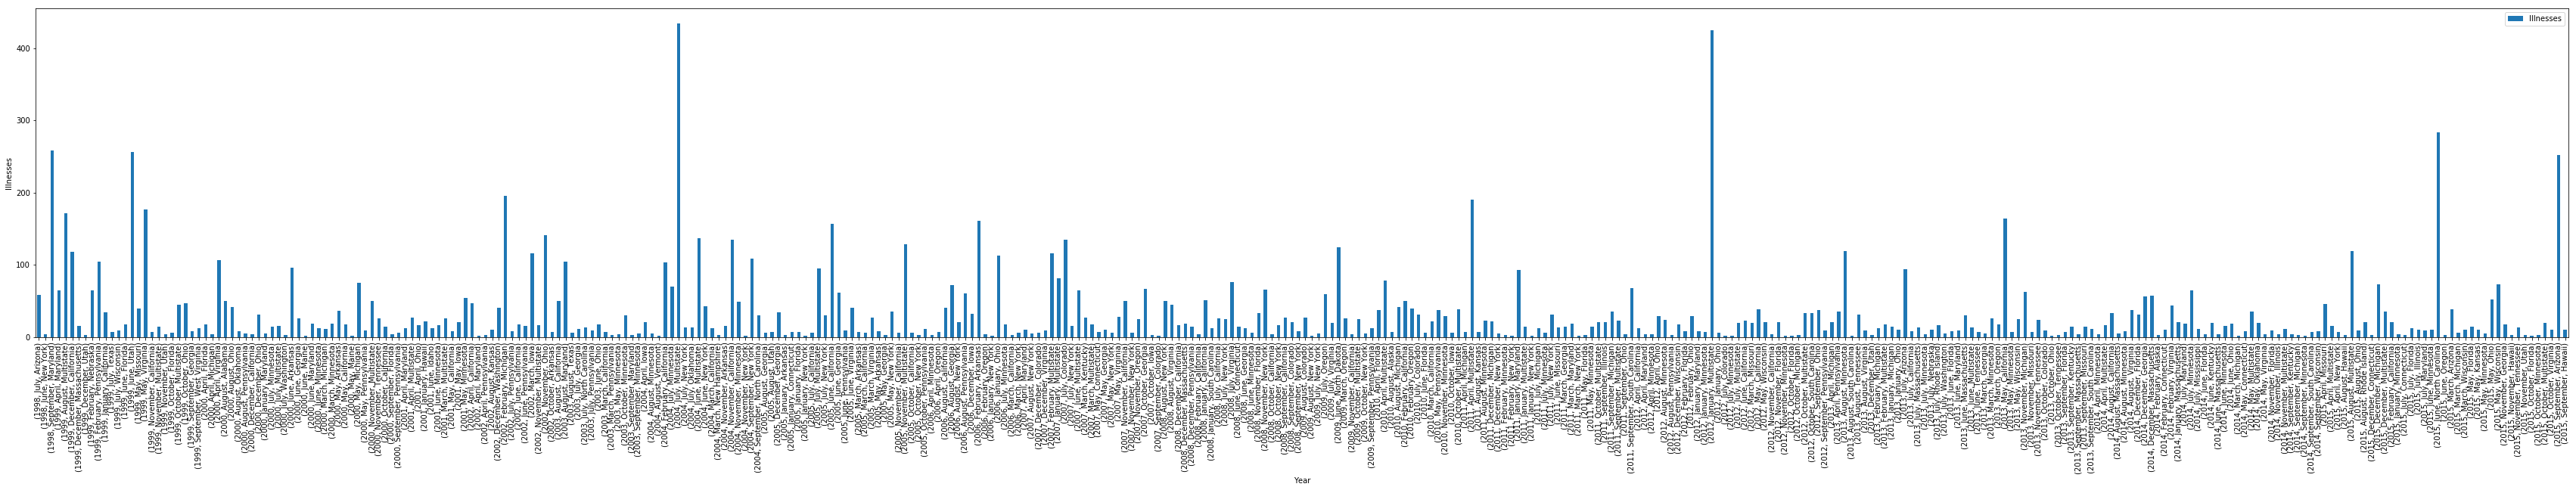

In [40]:
#to check whether 1999 is the year with most illnesses 
#the entire distribution of 1999 with year,state,month
#we can see it was max in utah
#lets check what food people consumed in utah in 1999
year_ms=df2[['Year','State', 'Month', 'Illnesses']]
year_mgs=year_ms.groupby(['Year', 'Month','State'])
year_mgs_total=year_mgs.sum()
year_mgs_plot = year_mgs_total.plot(kind='bar')


year_mgs_plot.set_xlabel("Year")
year_mgs_plot.set_ylabel("Illnesses")
plt.rcParams['figure.figsize'] = (10,8)

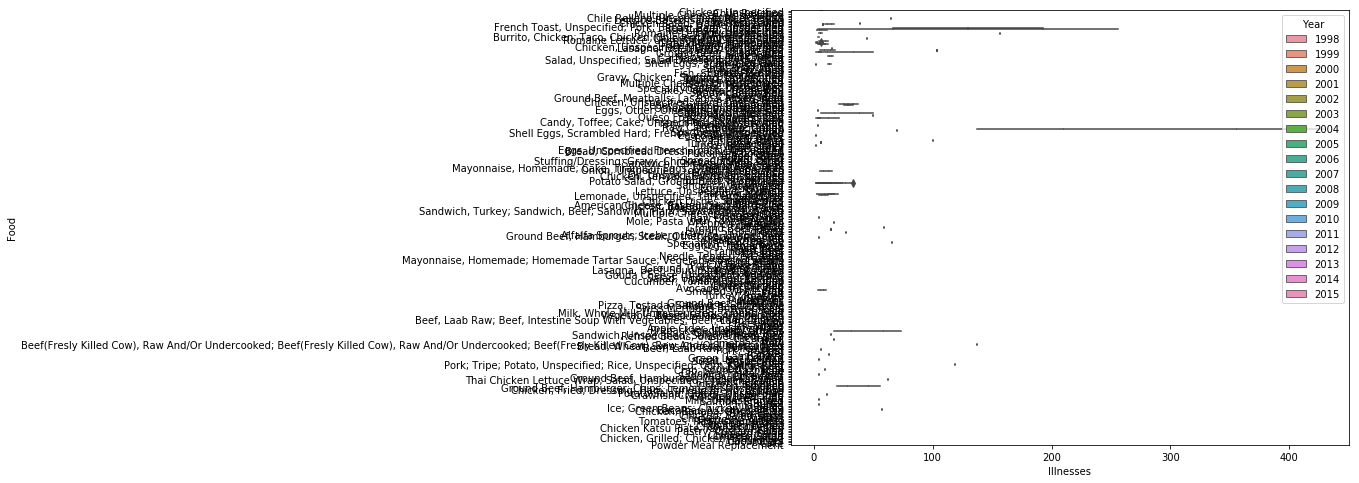

In [41]:
sns.boxplot(x="Illnesses", y="Food", hue="Year", data=df2)
plt.rcParams['figure.figsize'] = (40, 28)

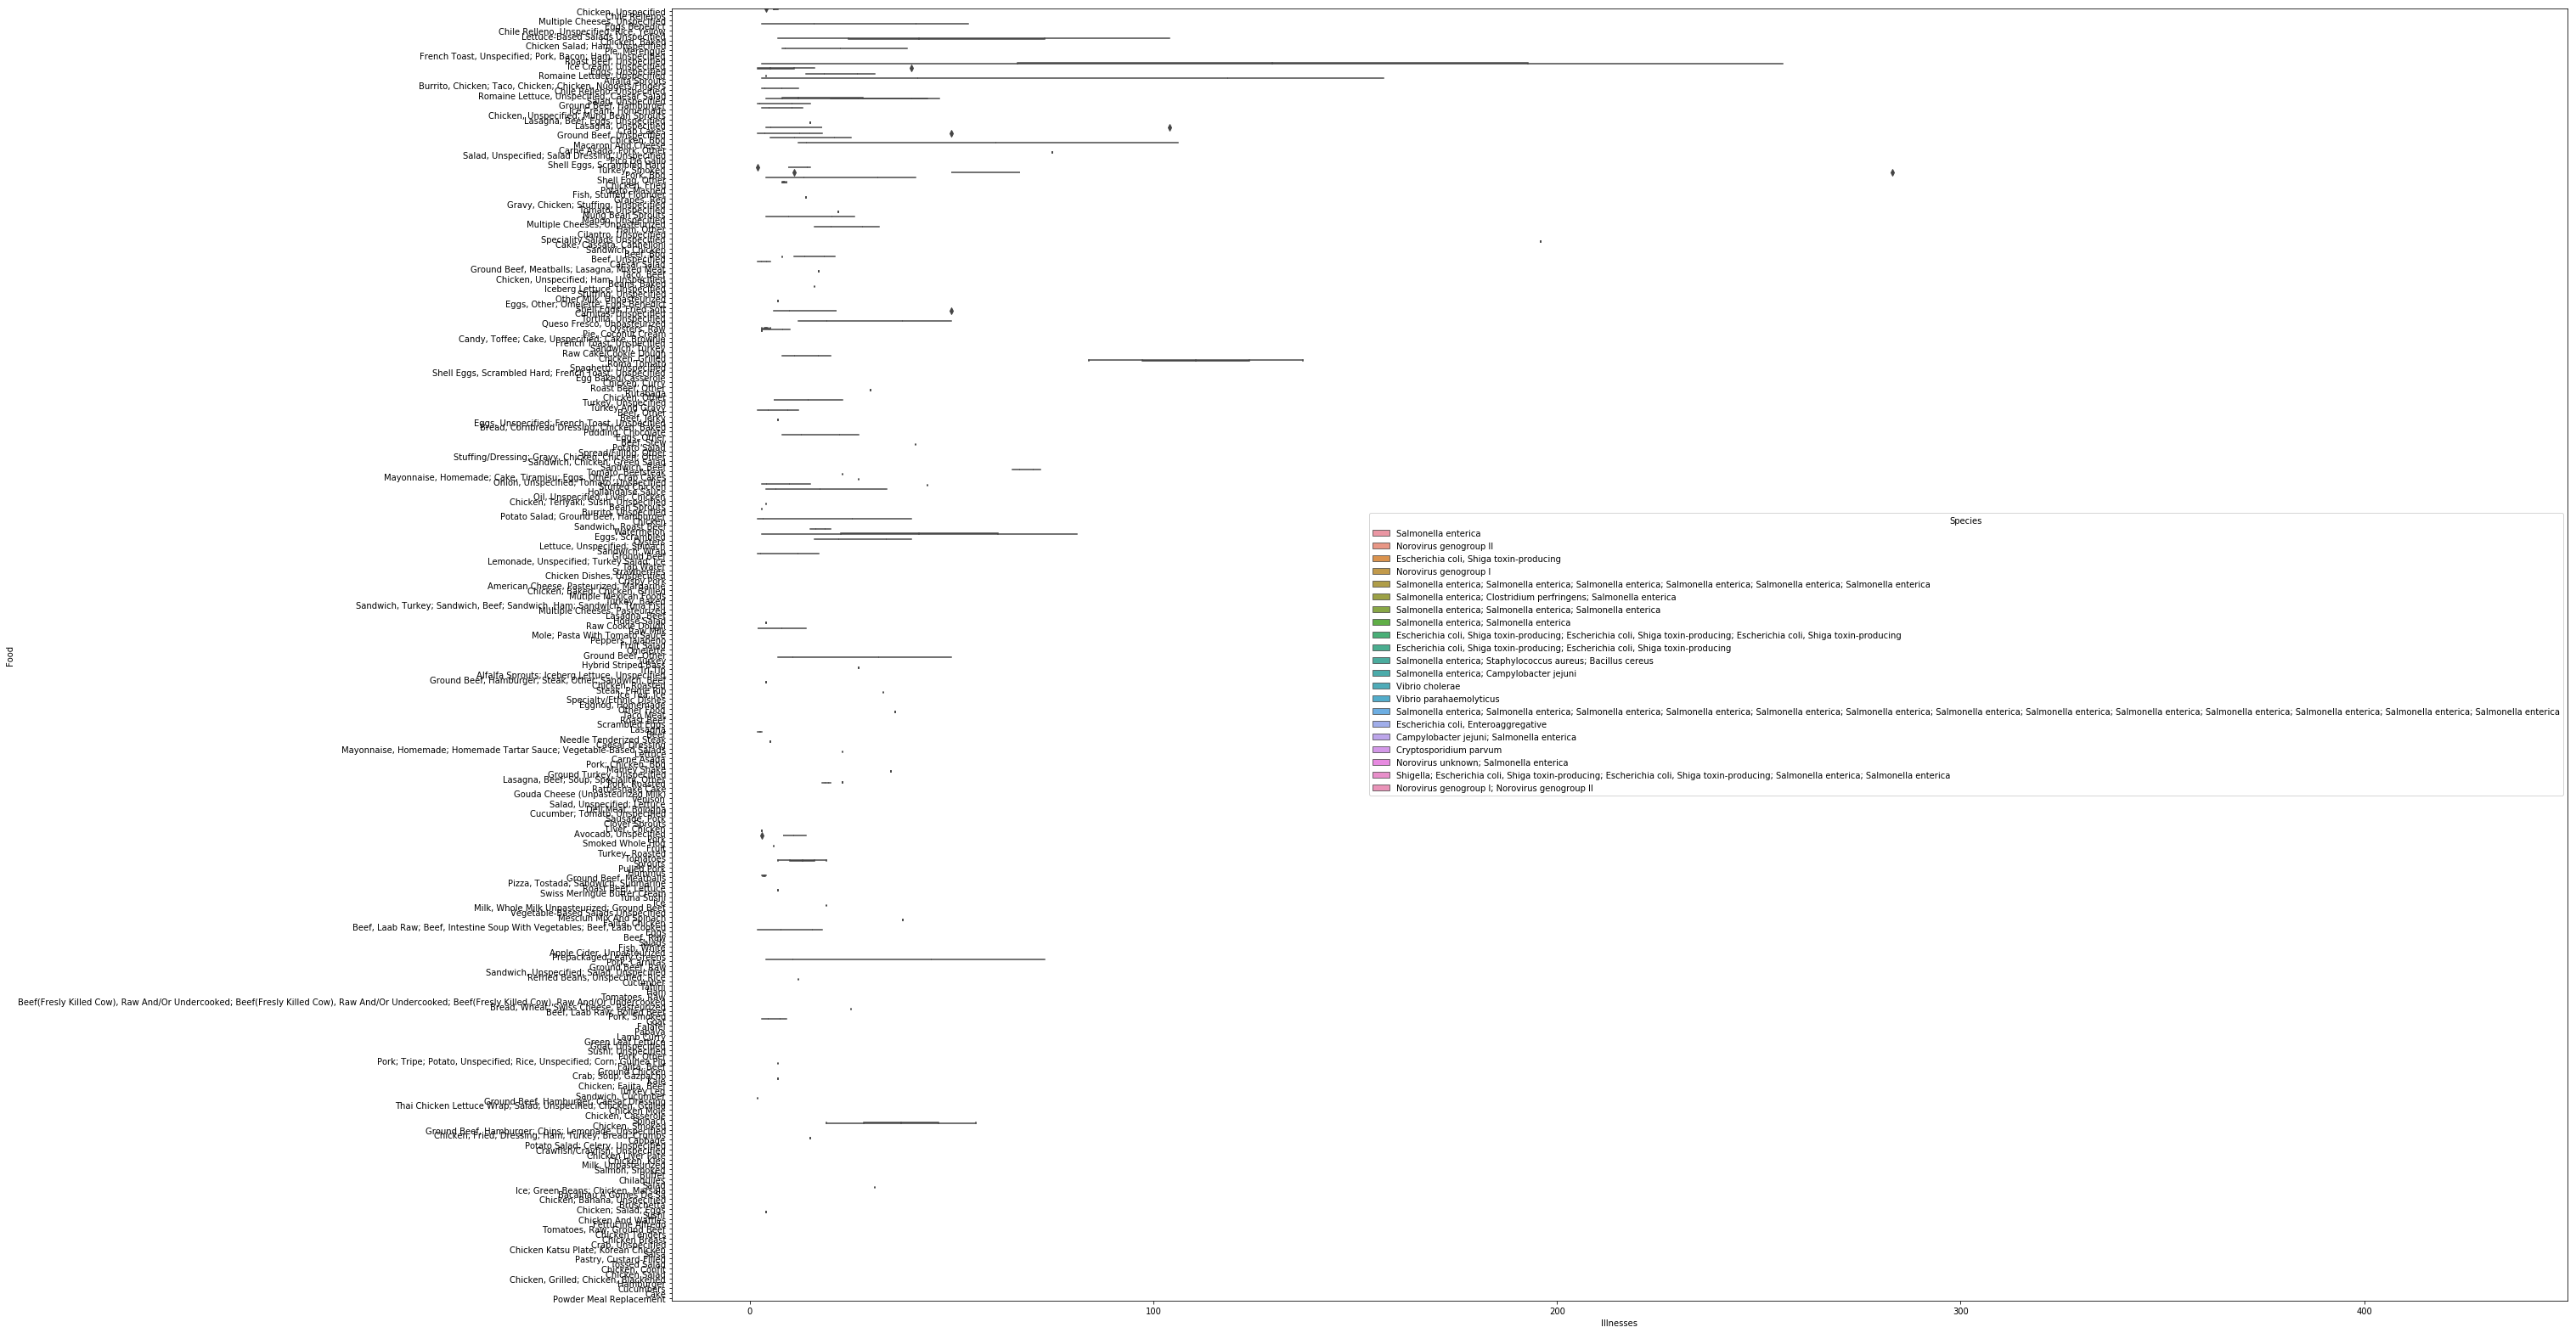

In [43]:
#the species which caused illnesses
sns.boxplot(x="Illnesses", y="Food", hue="Species", data=df2)
plt.rcParams['figure.figsize'] = (50, 11)
#zooming in we can see 'salomonia entarica' caused most of the illnessess

                  Illnesses  Fatalities  Hospitalizations
Illnesses          1.000000    0.027433          0.668744
Fatalities         0.027433    1.000000          0.052932
Hospitalizations   0.668744    0.052932          1.000000


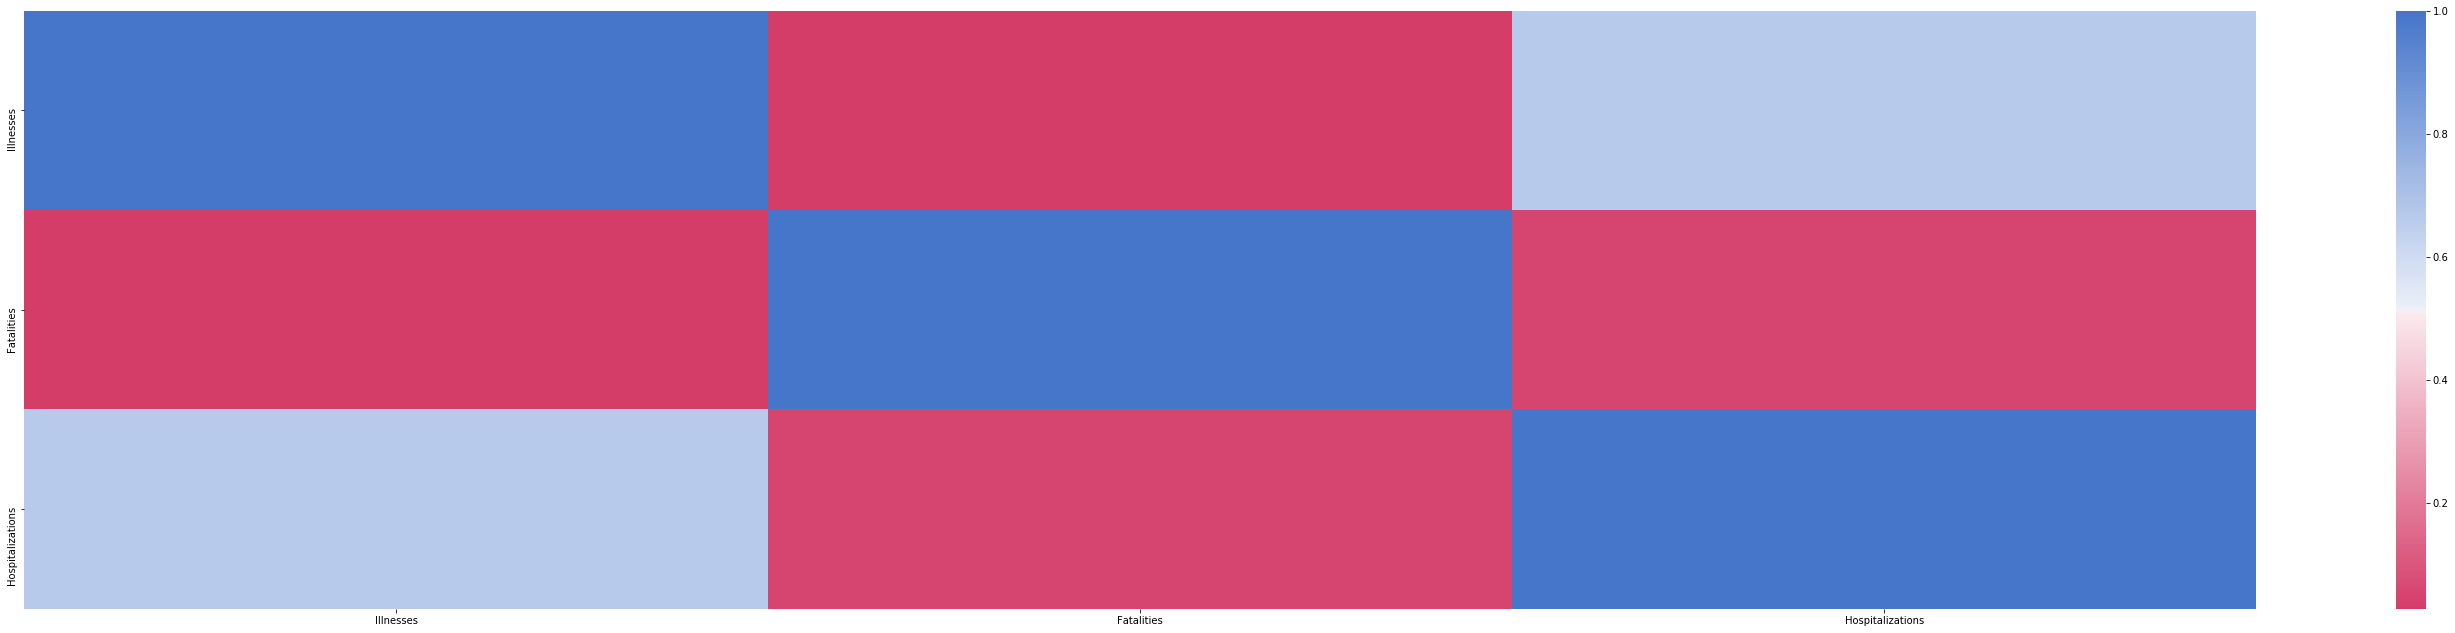

In [44]:
#correlation part
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df2[['Illnesses', 'Fatalities', 'Hospitalizations']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.rcParams['figure.figsize'] = (20,10)

#the above analysis gives answers to most of our questions.
#the summary-Most of the illnesses were in year 1999 .
#the food ice cream had 'Salmonella Enterica' which caused most of the illnesses.